In [25]:
import json
import sys
import os

exp_name = 'imagenet_m_2h'
dataset_name = 'imagenet'
results_dir = '../exps/{}/best/results'.format(exp_name)

results_all = {}
for filename in os.listdir(results_dir):
    if filename.endswith('_results.json'):
        with open(os.path.join(results_dir, filename), 'r') as f:
            results = json.load(f)
        expl_name = filename.split('_')[0]
        results_all[expl_name] = results

expl_names_all = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'Grad-CAM',
    'intgrad': 'IntGrad',
    'archipelago': 'Archi-pelago',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP (ours)'
}
# expl_names_list = [k for k in ['lime', 'shap', 'rise', 'gradcam', 'intgrad', 'archipelago', 'fresh', 'sop'] if k in results_all]
if dataset_name in ['imagenet']:
    expl_names_list = ['lime', 'shap', 'rise', 'gradcam', 'intgrad', 'archipelago', 'fresh', 'sop']
else:
    expl_names_list = ['lime', 'shap', 'rise', 'intgrad', 'archipelago', 'idg', 'pls', 'fresh', 'sop']
# expl_names = {k:expl_names_all[k] for k in results_all if k in results_all}

dataset_names = {
    'imagenet': 'ImageNet',
    'multirc': 'MultiRC',
    'sst': 'SST'
}

def gen_latex_table(results_all, expl_names, expl_names_list, dataset_name, dataset_names):
    print('\\toprule')
    print(' & ', end='')
    for expl_name in expl_names_list:
        print('& {} '.format(expl_names[expl_name]), end='')
    print('\\\\ \\midrule')
    print('\\multirow{3}{*}{' + dataset_names[dataset_name] + '} & Accuracy $\\uparrow$ ', end='')
    accuracy_mean_max = max([results_all[expl_name]['accuracy_mean'] for expl_name in expl_names_list if expl_name in results_all])
    for expl_name in expl_names_list:
        if expl_name in results_all:
            if results_all[expl_name]['accuracy_mean'] == accuracy_mean_max:
                print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['accuracy_mean']), end='')
            else:
                print('& {:.4f} '.format(results_all[expl_name]['accuracy_mean']), end='')
        else:
            print(' & ', end='')
    print('\\\\')
    print(' & Fidelity $\\uparrow$ ', end='')
    fidelity_mean_max = max([results_all[expl_name]['fidelity_mean'] \
                                for expl_name in expl_names_list if expl_name in results_all])
    for expl_name in expl_names_list:
        if expl_name in results_all:
            if results_all[expl_name]['fidelity_mean'] == fidelity_mean_max:
                print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['fidelity_mean']), end='')
            else:
                print('& {:.4f} '.format(results_all[expl_name]['fidelity_mean']), end='')
        else:
            print(' & ', end='')
    print('\\\\')
    print(' & Soft Fidelity Loss $\\downarrow$ ', end='')
    soft_fidelity_loss_min = min([results_all[expl_name]['soft_fidelity_loss_mean'] \
                                  for expl_name in expl_names_list if expl_name in results_all])
    for expl_name in expl_names_list:
        if expl_name in results_all:
            if results_all[expl_name]['soft_fidelity_loss_mean'] == soft_fidelity_loss_min:
                print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['soft_fidelity_loss_mean']), end='')
            else:
                print('& {:.4f} '.format(results_all[expl_name]['soft_fidelity_loss_mean']), end='')
        else:
            print(' & ', end='')
    print('\\\\')
    print(' & Insertion Score $\\uparrow$ ', end='')
    ins_mean_max = max([results_all[expl_name]['ins_mean'] for expl_name in expl_names_list if expl_name in results_all])
    for expl_name in expl_names_list:
        if expl_name in results_all:
            if results_all[expl_name]['ins_mean'] == ins_mean_max:
                print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['ins_mean']), end='')
            else:
                print('& {:.4f} '.format(results_all[expl_name]['ins_mean']), end='')
        else:
            print(' & ', end='')
    print('\\\\')
    print(' & Deletion Score $\\downarrow$ ', end='')
    del_mean_min = min([results_all[expl_name]['del_mean'] for expl_name in expl_names_list if expl_name in results_all])
    for expl_name in expl_names_list:
        if expl_name in results_all:
            if results_all[expl_name]['del_mean'] == del_mean_min:
                print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['del_mean']), end='')
            else:
                print('& {:.4f} '.format(results_all[expl_name]['del_mean']), end='')
        else:
            print(' & ', end='')
    print('\\\\')
    print('\\bottomrule')

gen_latex_table(results_all, expl_names_all, expl_names_list, dataset_name, dataset_names)

\toprule
 & & LIME & SHAP & RISE & Grad-CAM & IntGrad & Archi-pelago & FRESH & SOP (ours) \\ \midrule
\multirow{3}{*}{ImageNet} & Accuracy $\uparrow$ & \textbf{0.9400} & \textbf{0.9400} & \textbf{0.9400} & \textbf{0.9400} & \textbf{0.9400} & \textbf{0.9400}  & & 0.9200 \\
 & Fidelity $\uparrow$ & 0.9200 & 0.9400 & 0.9600 & 0.3200 & 0.1000 & 0.3400  & & \textbf{1.0000} \\
 & Soft Fidelity Loss $\downarrow$ & 0.6803 & 0.0327 & 0.1841 & 7.4360 & 8.4876 & 6.0146  & & \textbf{0.0000} \\
 & Insertion Score $\uparrow$ & 0.4127 & \textbf{0.7961} & 0.7089 & 0.5977 & 0.3697 & 0.3660  & & 0.2395 \\
 & Deletion Score $\downarrow$ & \textbf{0.1916} & 0.4422 & 0.5090 & 0.4745 & 0.4137 & 0.2301  & & 0.3531 \\
\bottomrule


In [26]:
fidelity_scores = [results_all[expl_name]['fidelity_mean'] if expl_name!='fresh' else 1 for expl_name in expl_names_list ]
fidelity_scores

[0.92, 0.94, 0.96, 0.32, 0.1, 0.34, 1, 1.0]

In [27]:
expl_names_list

['lime', 'shap', 'rise', 'gradcam', 'intgrad', 'archipelago', 'fresh', 'sop']

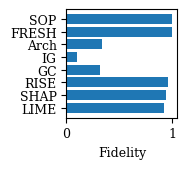

In [47]:
expl_names_all_fig = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'GC',
    'intgrad': 'IG',
    'archipelago': 'Arch',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP'
}
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Serif'


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2, 1.8))
ind = list(range(len(fidelity_scores)))
bars = ax.barh(range(len(fidelity_scores)), fidelity_scores)
ax.set_yticks(ind)
ax.set_yticklabels([expl_names_all_fig[expl_name] for expl_name in expl_names_list])
# Add numbers on top of the bars
# for bar in bars:
#     xval = bar.get_width()
#     ax.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='right', va='center', fontsize=9)

plt.xlabel('Fidelity', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('figs/fidelity-imagenet.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

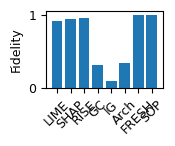

In [32]:
fidelity_scores = [results_all[expl_name]['fidelity_mean'] if expl_name!='fresh' else 1 for expl_name in expl_names_list ]

expl_names_all_fig = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'GC',
    'intgrad': 'IG',
    'archipelago': 'Arch',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP'
}


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(1.5, 1))
ind = list(range(len(fidelity_scores)))
bars = ax.bar(range(len(fidelity_scores)), fidelity_scores)
ax.set_xticks(ind)
ax.set_xticklabels([expl_names_all_fig[expl_name] for expl_name in expl_names_list], rotation=45)
# Add numbers on top of the bars
# for bar in bars:
#     yval = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=14)

plt.ylabel('Fidelity', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.savefig('figs/fidelity-imagenet.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

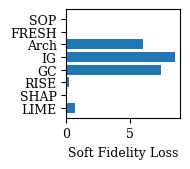

In [46]:
expl_names_all_fig = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'GC',
    'intgrad': 'IG',
    'archipelago': 'Arch',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP'
}

soft_fidelity_scores = [results_all[expl_name]['soft_fidelity_loss_mean'] if expl_name!='fresh' else 0 for expl_name in expl_names_list ]
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Serif'

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2, 1.8))
ind = list(range(len(soft_fidelity_scores)))
bars = ax.barh(range(len(soft_fidelity_scores)), soft_fidelity_scores)
ax.set_yticks(ind)
ax.set_yticklabels([expl_names_all_fig[expl_name] for expl_name in expl_names_list])
# Add numbers on top of the bars
# for bar in bars:
#     xval = bar.get_width()
#     ax.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='right', va='center', fontsize=9)

plt.xlabel('Soft Fidelity Loss', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('figs/soft-fidelity-imagenet.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

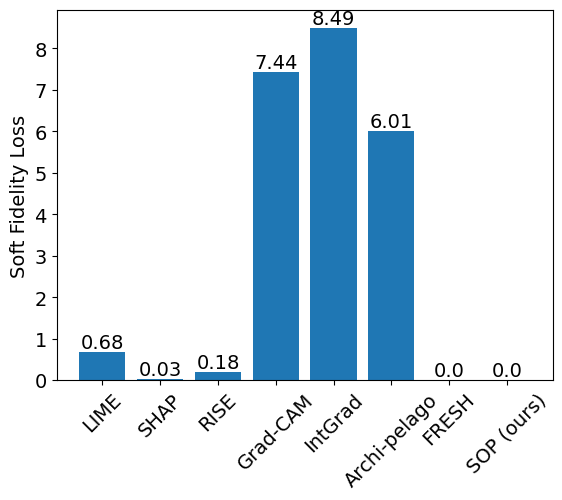

In [116]:
soft_fidelity_scores = [results_all[expl_name]['soft_fidelity_loss_mean'] if expl_name!='fresh' else 0 for expl_name in expl_names_list ]

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ind = list(range(len(soft_fidelity_scores)))
bars = ax.bar(range(len(soft_fidelity_scores)), soft_fidelity_scores)
ax.set_xticks(ind)
ax.set_xticklabels([expl_names_all[expl_name] for expl_name in expl_names_list], rotation=45)
# Add numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=14)

plt.ylabel('Soft Fidelity Loss', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figs/soft-fidelity-imagenet.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [2]:
import json
import sys
import os

exp_name = 'imagenet_m_2h'
dataset_name = 'imagenet'
results_dir = '../exps/{}/best/results_b'.format(exp_name)

results_all = {}
for filename in os.listdir(results_dir):
    if filename.endswith('_results.json'):
        with open(os.path.join(results_dir, filename), 'r') as f:
            results = json.load(f)
        expl_name = filename.split('_')[0]
        results_all[expl_name] = results

expl_names_all = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'Grad-CAM',
    'intgrad': 'IntGrad',
    'archipelago': 'Archi-pelago',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP (ours)'
}
# expl_names_list = [k for k in ['lime', 'shap', 'rise', 'gradcam', 'intgrad', 'archipelago', 'fresh', 'sop'] if k in results_all]
if dataset_name in ['imagenet']:
    expl_names_list = ['lime', 'shap', 'rise', 'gradcam', 'intgrad', 'archipelago', 'fresh', 'sop']
else:
    expl_names_list = ['lime', 'shap', 'rise', 'intgrad', 'archipelago', 'idg', 'pls', 'fresh', 'sop']
# expl_names = {k:expl_names_all[k] for k in results_all if k in results_all}

dataset_names = {
    'imagenet': 'ImageNet',
    'multirc': 'MultiRC',
    'sst': 'SST'
}

def gen_latex_table(results_all, expl_names, expl_names_list, dataset_name, dataset_names):
    print('\\toprule')
    print(' & ', end='')
    for expl_name in expl_names_list:
        print('& {} '.format(expl_names[expl_name]), end='')
    print('\\\\ \\midrule')
    print('\\multirow{3}{*}{' + dataset_names[dataset_name] + '} & Accuracy $\\uparrow$ ', end='')
    accuracy_mean_max = max([results_all[expl_name]['accuracy_mean'] for expl_name in expl_names_list if expl_name in results_all])
    for expl_name in expl_names_list:
        if expl_name in results_all:
            if results_all[expl_name]['accuracy_mean'] == accuracy_mean_max:
                print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['accuracy_mean']), end='')
            else:
                print('& {:.4f} '.format(results_all[expl_name]['accuracy_mean']), end='')
        else:
            print(' & ', end='')
    print('\\\\')
    print(' & Fidelity $\\uparrow$ ', end='')
    fidelity_mean_max = max([results_all[expl_name]['fidelity_mean'] \
                                for expl_name in expl_names_list if expl_name in results_all])
    for expl_name in expl_names_list:
        if expl_name in results_all:
            if results_all[expl_name]['fidelity_mean'] == fidelity_mean_max:
                print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['fidelity_mean']), end='')
            else:
                print('& {:.4f} '.format(results_all[expl_name]['fidelity_mean']), end='')
        else:
            print(' & ', end='')
    print('\\\\')
    print(' & Soft Fidelity Loss $\\downarrow$ ', end='')
    soft_fidelity_loss_min = min([results_all[expl_name]['soft_fidelity_loss_mean'] \
                                  for expl_name in expl_names_list if expl_name in results_all])
    for expl_name in expl_names_list:
        if expl_name in results_all:
            if results_all[expl_name]['soft_fidelity_loss_mean'] == soft_fidelity_loss_min:
                print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['soft_fidelity_loss_mean']), end='')
            else:
                print('& {:.4f} '.format(results_all[expl_name]['soft_fidelity_loss_mean']), end='')
        else:
            print(' & ', end='')
    print('\\\\')
    print(' & NNZ $\\downarrow$ ', end='')
    nnz_mean_min = min([results_all[expl_name]['nnz_mean'] for expl_name in expl_names_list if expl_name in results_all])
    for expl_name in expl_names_list:
        if expl_name in results_all:
            if results_all[expl_name]['nnz_mean'] == nnz_mean_min:
                print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['nnz_mean']), end='')
            else:
                print('& {:.4f} '.format(results_all[expl_name]['nnz_mean']), end='')
        else:
            print(' & ', end='')
    print('\\\\')

gen_latex_table(results_all, expl_names_all, expl_names_list, dataset_name, dataset_names)

\toprule
 & & LIME & SHAP & RISE & Grad-CAM & IntGrad & Archi-pelago & FRESH & SOP (ours) \\ \midrule
\multirow{3}{*}{ImageNet} & Accuracy $\uparrow$ & \textbf{0.9400} & \textbf{0.9400} & \textbf{0.9400} & \textbf{0.9400} & \textbf{0.9400} & \textbf{0.9400}  & & 0.9200 \\
 & Fidelity $\uparrow$ & 0.9200 & 0.9400 & 0.9600 & 0.3200 & 0.1000 & 0.3400  & & \textbf{1.0000} \\
 & Soft Fidelity Loss $\downarrow$ & 0.6803 & 0.0327 & 0.1841 & 7.4360 & 8.4876 & 6.0146  & & \textbf{0.0000} \\
 & NNZ $\downarrow$ & \textbf{0.0156} & 0.8838 & 1.0000 & 0.7482 & 0.4996 & 0.0163  & & 0.6819 \\


In [81]:
import json
import sys
import os

exp_name = 'imagenet_1h_lr8e-06_gg0.02_gs1.0_ts-1_vs2_stcosine_ep0.5'
dataset_name = 'imagenet'
results_dir = '../exps/{}/best/results'.format(exp_name)

sop_explainer_name = 'sop_gg0.001'

expl_names_all = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'Grad-CAM',
    'intgrad': 'IntGrad',
    'archipelago': 'Archi-pelago',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP (ours)'
}

potential_filenames = {0.001: 'sop_gg0.001_results.json',
                       0.005: 'sop_gg0.005_results.json',
                      0.01: 'sop_gg0.01_results.json',
                      0.02: 'sop_results.json'}



# if dataset_name == 'sst':
#     potential_filenames = {expl_name: f'{sop_explainer_name}_{expl_name}_results.json' for expl_name in expl_names_all}
# else:
#     # potential_filenames = {expl_name: f'{expl_name}_results_insdel.json' for expl_name in expl_names_all}
#     potential_filenames = {expl_name: f'{expl_name}_results_insdel.json' for expl_name in expl_names_all}
#     # potential_filenames['fresh'] = 'fresh_fresh_results.json'
# # potential_filenames['sop'] = 'sop_results.json' #'sop_gg0.1_results.json'
# potential_filenames['sop'] = 'sop_results_insdel.json' #'sop_gg0.1_results.json'

results_all = {}
filenames_all = {}
for filename in os.listdir(results_dir):
    for expl_name in potential_filenames:
        filename = potential_filenames[expl_name]
        if os.path.exists(os.path.join(results_dir, filename)):
            
    # if filename in potential_filenames:
    # if filename.endswith(f'{sop_explainer_name}_results.json'):
            with open(os.path.join(results_dir, filename), 'r') as f:
                results = json.load(f)
            # expl_name = filename.split('_')[0]
            results_all[expl_name] = results
            filenames_all[expl_name] = filename

print(filenames_all)
            

{0.001: 'sop_gg0.001_results.json', 0.005: 'sop_gg0.005_results.json', 0.01: 'sop_gg0.01_results.json', 0.02: 'sop_results.json'}


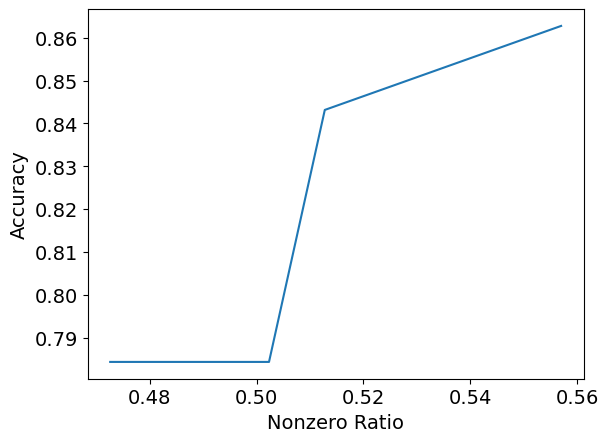

In [84]:
import matplotlib.pyplot as plt
accs = [results_all[scale]['accuracies_mean'] for scale in potential_filenames]
nnzs = [results_all[scale]['nnzs_mean'] for scale in potential_filenames]

fig, ax = plt.subplots()
plt.plot(nnzs, accs)

plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Nonzero Ratio', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figs/nnzs-accs-imagenet.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [85]:
nnzs

[0.5570002034598706,
 0.512763569168016,
 0.5023189198737051,
 0.47258924327644647]

In [86]:
accs

[0.8627450980392157,
 0.8431372549019608,
 0.7843137254901961,
 0.7843137254901961]

In [48]:
import json
import sys
import os

exp_name = 'imagenet_1h_lr8e-06_gg0.02_gs1.0_ts-1_vs2_stcosine_ep0.5'
dataset_name = 'imagenet'
results_dir = '../exps/{}/best/results_save'.format(exp_name)

sop_explainer_name = 'sop_gg0.001'

expl_names_all = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'Grad-CAM',
    'intgrad': 'IntGrad',
    'archipelago': 'Archi-pelago',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP (ours)'
}

if dataset_name == 'sst':
    potential_filenames = {expl_name: f'{sop_explainer_name}_{expl_name}_results.json' for expl_name in expl_names_all}
else:
    # potential_filenames = {expl_name: f'{expl_name}_results_insdel.json' for expl_name in expl_names_all}
    potential_filenames = {expl_name: f'{expl_name}_results_insdel.json' for expl_name in expl_names_all}
    # potential_filenames['fresh'] = 'fresh_fresh_results.json'
# potential_filenames['sop'] = 'sop_results.json' #'sop_gg0.1_results.json'
potential_filenames['sop'] = 'sop_results_insdel.json' #'sop_gg0.1_results.json'

results_all = {}
filenames_all = {}
for filename in os.listdir(results_dir):
    for expl_name in potential_filenames:
        filename = potential_filenames[expl_name]
        if os.path.exists(os.path.join(results_dir, filename)):
            
    # if filename in potential_filenames:
    # if filename.endswith(f'{sop_explainer_name}_results.json'):
            with open(os.path.join(results_dir, filename), 'r') as f:
                results = json.load(f)
            # expl_name = filename.split('_')[0]
            results_all[expl_name] = results
            filenames_all[expl_name] = filename

print(filenames_all)
            
if dataset_name == 'imagenet':
    potential_filenames_new = {expl_name: f'{expl_name}_results.json' for expl_name in expl_names_all}
        # potential_filenames['fresh'] = 'fresh_fresh_results.json'
    # potential_filenames['sop'] = 'sop_results.json' #'sop_gg0.1_results.json'
    potential_filenames_new['sop'] = 'sop_results.json' #'sop_gg0.1_results.json'
    potential_filenames_new['fresh'] = 'fresh_results.json'

    # results_all = {}
    # filenames_all = {}
    for filename in os.listdir(results_dir):
        for expl_name in potential_filenames_new:
            filename = potential_filenames_new[expl_name]
            if os.path.exists(os.path.join(results_dir, filename)):

        # if filename in potential_filenames:
        # if filename.endswith(f'{sop_explainer_name}_results.json'):
                with open(os.path.join(results_dir, filename), 'r') as f:
                    results = json.load(f)
                # expl_name = filename.split('_')[0]
                results_all[expl_name] = results
                filenames_all[expl_name] = filename
    print(filenames_all)


# expl_names_list = [k for k in ['lime', 'shap', 'rise', 'gradcam', 'intgrad', 'archipelago', 'fresh', 'sop'] if k in results_all]
if dataset_name in ['imagenet']:
    expl_names_list = ['lime', 'shap', 'rise', 'gradcam', 'intgrad', 'archipelago', 'fresh', 'sop']
else:
    expl_names_list = ['lime', 'shap', 'rise', 'intgrad', 'archipelago', 'idg', 'pls', 'fresh', 'sop']
# expl_names = {k:expl_names_all[k] for k in results_all if k in results_all}

dataset_names = {
    'imagenet': 'ImageNet',
    'multirc': 'MultiRC',
    'sst': 'SST'
}


{'lime': 'lime_results_insdel.json', 'shap': 'shap_results_insdel.json', 'rise': 'rise_results_insdel.json', 'gradcam': 'gradcam_results_insdel.json', 'intgrad': 'intgrad_results_insdel.json', 'archipelago': 'archipelago_results_insdel.json', 'sop': 'sop_results_insdel.json'}
{'lime': 'lime_results.json', 'shap': 'shap_results.json', 'rise': 'rise_results.json', 'gradcam': 'gradcam_results.json', 'intgrad': 'intgrad_results.json', 'archipelago': 'archipelago_results.json', 'sop': 'sop_results.json', 'fresh': 'fresh_results.json'}


In [49]:
if dataset_name in ['imagenet']:
    result_names_minmax = {
        'accuracies_mean': max,
  'pred_agreements_mean': max,
  # 'pred_agreements_soft_mean': min,
  'expln_aggr_fidelities_mean': max,
  # 'expln_aggr_fidelities_soft_mean': min,
  # 'preservations_mean': max,
  'preservations_original_mean': max,
  # 'preservations_mean_topk': max,
  'preservations_original_mean_topk': max,
  'expln_aggr_accuracies_mean': max,
  'nnzs_mean': min,
  'ngroups_mean': min,
        'inss_mean': max,
        'inss_original_mean': max,
        'dels_mean': min,
        'dels_original_mean': min,
    }
    sop_result_name_swap = {
        'inss_original_mean': 'inss_mean',
        'dels_original_mean': 'dels_mean',
        'preservations_original_mean_topk': 'preservations_mean_topk',
        'preservations_original_mean': 'preservations_mean'
    }
else:
    result_names_minmax = {'accuracies_mean': max,
  'pred_agreements_mean': max,
  # 'pred_agreements_soft_mean': min,
  'expln_aggr_fidelities_mean': max,
  # 'expln_aggr_fidelities_soft_mean': min,
  # 'preservations_mean': max,
  # 'preservations_original_mean': max,
  # 'preservations_mean_topk': max,
  'preservations_original_mean_topk': max,
  'expln_aggr_accuracies_mean': max,
  'nnzs_mean': min,
  'ngroups_mean': min,
  # 'comps_mean': max,
  'comps_original_mean': max,
  # 'suffs_mean': min,
  'suffs_original_mean': min}
    sop_result_name_swap = {
        'comps_original_mean': 'comps_mean',
        'suffs_original_mean': 'suffs_mean',
        'preservations_original_mean_topk': 'preservations_mean_topk'
    }

In [50]:
from collections import defaultdict

results_all_new = defaultdict(dict)
for r_i, result_name in enumerate(result_names_minmax):
    for expl_name in expl_names_list:
        if expl_name in ['sop', 'fresh'] and result_name in sop_result_name_swap:
            result_name_use = sop_result_name_swap[result_name]
        else:
            result_name_use = result_name
        if expl_name in results_all:
            results_all_new[expl_name][result_name] = results_all[expl_name][result_name_use]

In [51]:

def gen_latex_table(results_all, expl_names, expl_names_list, dataset_name, dataset_names):
    print('\\toprule')
    print(' & ', end='')
    for expl_name in expl_names_list:
        print('& {} '.format(expl_names[expl_name]), end='')
    print('\\\\ \\midrule')
    # print('\\multirow{3}{*}{' + dataset_names[dataset_name] + '} & Accuracy $\\uparrow$ ', end='')
    # accuracy_mean_max = max([results_all[expl_name]['accuracy_mean'] for expl_name in expl_names_list if expl_name in results_all])
    # for expl_name in expl_names_list:
    #     if expl_name in results_all:
    #         if results_all[expl_name]['accuracy_mean'] == accuracy_mean_max:
    #             print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['accuracy_mean']), end='')
    #         else:
    #             print('& {:.4f} '.format(results_all[expl_name]['accuracy_mean']), end='')
    #     else:
    #         print(' & ', end='')
    print('\\\\')
    for r_i, result_name in enumerate(result_names_minmax):
        best = result_names_minmax[result_name]
        result_name_display = ' '.join(result_name.split('_'))
        if best == min:
            print(f' & {result_name_display} $\\downarrow$', end='')
        else:
            print(f' & {result_name_display} $\\uparrow$', end='')
        score_mean_best = best([results_all[expl_name][result_name] \
                                    for expl_name in expl_names_list if expl_name in results_all])
        for expl_name in expl_names_list:
            # if expl_name == 'sop' and result_name in sop_result_name_swap:
            #     result_name_use = sop_result_name_swap[result_name]
            # else:
            #     result_name_use = result_name
            if expl_name in results_all:
                result_val = results_all[expl_name][result_name]
                
                if result_val == score_mean_best:
                    if round(result_val, 4) == 0:
                        result_val = abs(result_val)
                    print('& \\textbf{{{:.4f}}} '.format(result_val), end='')
                else:
                    if round(result_val, 4) == 0:
                        result_val = abs(result_val)
                    print('& {:.4f} '.format(result_val), end='')
            else:
                print(' & ', end='')
        print('\\\\')
    # print(' & Soft Fidelity Loss $\\downarrow$ ', end='')
    # soft_fidelity_loss_min = min([results_all[expl_name]['soft_fidelity_loss_mean'] \
    #                               for expl_name in expl_names_list if expl_name in results_all])
    # for expl_name in expl_names_list:
    #     if expl_name in results_all:
    #         if results_all[expl_name]['soft_fidelity_loss_mean'] == soft_fidelity_loss_min:
    #             print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['soft_fidelity_loss_mean']), end='')
    #         else:
    #             print('& {:.4f} '.format(results_all[expl_name]['soft_fidelity_loss_mean']), end='')
    #     else:
    #         print(' & ', end='')
    # print('\\\\')
    # print(' & NNZ $\\downarrow$ ', end='')
    # nnz_mean_min = min([results_all[expl_name]['nnz_mean'] for expl_name in expl_names_list if expl_name in results_all])
    # for expl_name in expl_names_list:
    #     if expl_name in results_all:
    #         if results_all[expl_name]['nnz_mean'] == nnz_mean_min:
    #             print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['nnz_mean']), end='')
    #         else:
    #             print('& {:.4f} '.format(results_all[expl_name]['nnz_mean']), end='')
    #     else:
    #         print(' & ', end='')
    # print('\\\\')

gen_latex_table(results_all_new, expl_names_all, expl_names_list, dataset_name, dataset_names)

\toprule
 & & LIME & SHAP & RISE & Grad-CAM & IntGrad & Archi-pelago & FRESH & SOP (ours) \\ \midrule
\\
 & accuracies mean $\uparrow$& \textbf{0.8431} & \textbf{0.8431} & 0.8052 & \textbf{0.8431} & \textbf{0.8431} & \textbf{0.8431} & 0.7647 & 0.7843 \\
 & pred agreements mean $\uparrow$& \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & 0.7451 & 0.8235 \\
 & expln aggr fidelities mean $\uparrow$& 0.8431 & 0.8235 & 0.7912 & 0.2549 & 0.0980 & 0.2745 & \textbf{1.0000} & \textbf{1.0000} \\
 & preservations original mean $\uparrow$& 0.8824 & 0.9216 & 0.8748 & 0.8431 & 0.5882 & 0.8824 & \textbf{1.0000} & 0.9020 \\
 & preservations original mean topk $\uparrow$& 0.6667 & 0.7059 & 0.3176 & 0.1765 & 0.0588 & 0.5294 & \textbf{1.0000} & 0.5294 \\
 & expln aggr accuracies mean $\uparrow$& 0.8824 & \textbf{0.9020} & 0.7354 & 0.2941 & 0.0980 & 0.3137 & 0.7647 & 0.7843 \\
 & nnzs mean $\downarrow$& 1.0000 & 1.0000 & 1.0000 & 0.7045 & 1.0000 &

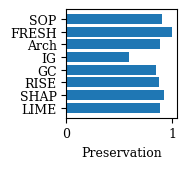

In [54]:
import matplotlib.pyplot as plt

expl_names_all_fig = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'GC',
    'intgrad': 'IG',
    'archipelago': 'Arch',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP'
}

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2, 1.8))
ind = list(range(len(preservation_scores)))
bars = ax.barh(range(len(preservation_scores)), preservation_scores)
ax.set_yticks(ind)
ax.set_yticklabels([expl_names_all_fig[expl_name] for expl_name in expl_names_list])
# Add numbers on top of the bars
# for bar in bars:
#     xval = bar.get_width()
#     ax.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='right', va='center', fontsize=9)

plt.xlabel('Preservation', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('figs/preservation-imagenet.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

# preservation_scores = [results_all_new[expl_name]['preservations_original_mean'] for expl_name in expl_names_list ]

# fig, ax = plt.subplots(figsize=(2, 1.8))
# ind = list(range(len(preservation_scores)))
# bars = ax.bar(range(len(preservation_scores)), preservation_scores)
# ax.set_xticks(ind)
# ax.set_xticklabels([expl_names_all_fig[expl_name] for expl_name in expl_names_list ], rotation=45)
# # Add numbers on top of the bars
# for bar in bars:
#     yval = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=14)

# plt.ylabel('Preservation', fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.savefig('figs/preservation-imagenet.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
# plt.show()

In [ ]:
expl_names_all_fig = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'GC',
    'intgrad': 'IG',
    'archipelago': 'Arch',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP'
}

soft_fidelity_scores = [results_all[expl_name]['soft_fidelity_loss_mean'] if expl_name!='fresh' else 0 for expl_name in expl_names_list ]
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Serif'

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2, 1.8))
ind = list(range(len(soft_fidelity_scores)))
bars = ax.barh(range(len(soft_fidelity_scores)), soft_fidelity_scores)
ax.set_yticks(ind)
ax.set_yticklabels([expl_names_all_fig[expl_name] for expl_name in expl_names_list])
# Add numbers on top of the bars
# for bar in bars:
#     xval = bar.get_width()
#     ax.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='right', va='center', fontsize=9)

plt.xlabel('Soft Fidelity Loss', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('figs/soft-fidelity-imagenet.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [99]:
import json
import sys
import os

exp_name = 'sst_m_1h_gg2.0_gs1.0'
dataset_name = 'sst'
results_dir = '../exps/{}/best/results'.format(exp_name)

sop_explainer_name = 'sop_gg0.001'

expl_names_all = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'Grad-CAM',
    'intgrad': 'IntGrad',
    'archipelago': 'Archi-pelago',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP (ours)'
}

potential_filenames = {
    0.1: 'sop_gg0.1_results.json',
                       0.5: 'sop_gg0.5_results.json',
                      1.0: 'sop_sop_gg1.0_results.json',
                      2.0: 'sop_sop_results.json'}



# if dataset_name == 'sst':
#     potential_filenames = {expl_name: f'{sop_explainer_name}_{expl_name}_results.json' for expl_name in expl_names_all}
# else:
#     # potential_filenames = {expl_name: f'{expl_name}_results_insdel.json' for expl_name in expl_names_all}
#     potential_filenames = {expl_name: f'{expl_name}_results_insdel.json' for expl_name in expl_names_all}
#     # potential_filenames['fresh'] = 'fresh_fresh_results.json'
# # potential_filenames['sop'] = 'sop_results.json' #'sop_gg0.1_results.json'
# potential_filenames['sop'] = 'sop_results_insdel.json' #'sop_gg0.1_results.json'

results_all = {}
filenames_all = {}
for filename in os.listdir(results_dir):
    for expl_name in potential_filenames:
        filename = potential_filenames[expl_name]
        if os.path.exists(os.path.join(results_dir, filename)):
            
    # if filename in potential_filenames:
    # if filename.endswith(f'{sop_explainer_name}_results.json'):
            with open(os.path.join(results_dir, filename), 'r') as f:
                results = json.load(f)
            # expl_name = filename.split('_')[0]
            results_all[expl_name] = results
            filenames_all[expl_name] = filename

print(filenames_all)
            

{0.1: 'sop_gg0.1_results.json', 0.5: 'sop_gg0.5_results.json', 1.0: 'sop_sop_gg1.0_results.json', 2.0: 'sop_sop_results.json'}


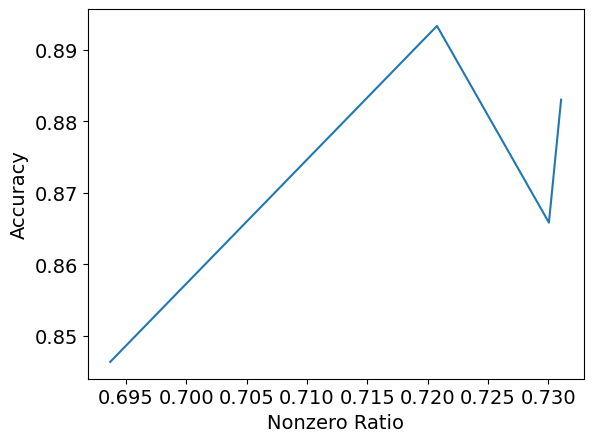

In [100]:
import matplotlib.pyplot as plt
import numpy as np

accs = [results_all[scale]['accuracies_mean'] for scale in potential_filenames]
nnzs = [results_all[scale]['nnzs_mean'] for scale in potential_filenames]
sort_idxs = np.argsort(nnzs)
nnzs_sort = [nnzs[i] for i in sort_idxs]
accs_sort = [accs[i] for i in sort_idxs]


fig, ax = plt.subplots()
plt.plot(nnzs_sort, accs_sort)

plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Nonzero Ratio', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figs/nnzs-accs-sst.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [101]:
accs, nnzs

([0.893348623853211,
  0.8830275229357798,
  0.8658256880733946,
  0.8463302752293578],
 [0.7207691662970486,
  0.7310475234728341,
  0.7300390067655559,
  0.693711388975792])

In [3]:
import json
import sys
import os

expl_names_all = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'Grad-CAM',
    'intgrad': 'IntGrad',
    'archipelago': 'Archi-pelago',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP (ours)'
}

exp_name = 'sst_m_1h_gg2.0_gs1.0'
dataset_name = 'sst'
results_dir = '../exps/{}/best/results'.format(exp_name)

sop_explainer_name = 'sop'

potential_filenames = {expl_name: f'{sop_explainer_name}_{expl_name}_results.json' for expl_name in expl_names_all}
potential_filenames['fresh'] = 'fresh_fresh_results.json'
potential_filenames['sop'] = 'sop_sop_results.json' #'sop_gg0.1_results.json'

results_all = {}
filenames_all = {}
for filename in os.listdir(results_dir):
    for expl_name in potential_filenames:
        filename = potential_filenames[expl_name]
        if os.path.exists(os.path.join(results_dir, filename)):
            
    # if filename in potential_filenames:
    # if filename.endswith(f'{sop_explainer_name}_results.json'):
            with open(os.path.join(results_dir, filename), 'r') as f:
                results = json.load(f)
            # expl_name = filename.split('_')[0]
            results_all[expl_name] = results
            filenames_all[expl_name] = filename
print(filenames_all)


# expl_names_list = [k for k in ['lime', 'shap', 'rise', 'gradcam', 'intgrad', 'archipelago', 'fresh', 'sop'] if k in results_all]
if dataset_name in ['imagenet']:
    expl_names_list = ['lime', 'shap', 'rise', 'gradcam', 'intgrad', 'archipelago', 'fresh', 'sop']
else:
    expl_names_list = ['lime', 'shap', 'rise', 'intgrad', 'archipelago', 'idg', 'pls', 'fresh', 'sop']
# expl_names = {k:expl_names_all[k] for k in results_all if k in results_all}

dataset_names = {
    'imagenet': 'ImageNet',
    'multirc': 'MultiRC',
    'sst': 'SST'
}


{'lime': 'sop_lime_results.json', 'shap': 'sop_shap_results.json', 'rise': 'sop_rise_results.json', 'intgrad': 'sop_intgrad_results.json', 'archipelago': 'sop_archipelago_results.json', 'pls': 'sop_pls_results.json', 'fresh': 'fresh_fresh_results.json', 'sop': 'sop_sop_results.json'}


In [4]:
result_names_minmax = {'accuracies_mean': max,
  'pred_agreements_mean': max,
  # 'pred_agreements_soft_mean': min,
  'expln_aggr_fidelities_mean': max,
  # 'expln_aggr_fidelities_soft_mean': min,
  # 'preservations_mean': max,
  # 'preservations_original_mean': max,
  # 'preservations_mean_topk': max,
  'preservations_original_mean_topk': max,
  'expln_aggr_accuracies_mean': max,
  'nnzs_mean': min,
  'ngroups_mean': min,
  # 'comps_mean': max,
  'comps_original_mean': max,
  # 'suffs_mean': min,
  'suffs_original_mean': min}
sop_result_name_swap = {
    'comps_original_mean': 'comps_mean',
    'suffs_original_mean': 'suffs_mean',
    'preservations_original_mean_topk': 'preservations_mean_topk'
}

In [5]:
from collections import defaultdict

results_all_new = defaultdict(dict)
for r_i, result_name in enumerate(result_names_minmax):
    for expl_name in expl_names_list:
        if expl_name in ['sop', 'fresh'] and result_name in sop_result_name_swap:
            result_name_use = sop_result_name_swap[result_name]
        else:
            result_name_use = result_name
        if expl_name in results_all:
            results_all_new[expl_name][result_name] = results_all[expl_name][result_name_use]

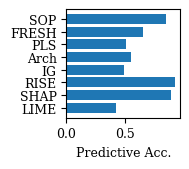

In [63]:
import matplotlib.pyplot as plt

expl_names_all_fig = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'GC',
    'intgrad': 'IG',
    'archipelago': 'Arch',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP'
}


expln_aggr_accuracies_scores = [results_all[expl_name]['expln_aggr_accuracies_mean'] 
                                for expl_name in expl_names_list if expl_name != 'idg']

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2, 1.8))
ind = list(range(len(expln_aggr_accuracies_scores)))
bars = ax.barh(range(len(expln_aggr_accuracies_scores)), expln_aggr_accuracies_scores)
ax.set_yticks(ind)
ax.set_yticklabels([expl_names_all_fig[expl_name] for expl_name in expl_names_list if expl_name != 'idg'])
# Add numbers on top of the bars
# for bar in bars:
#     xval = bar.get_width()
#     ax.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='right', va='center', fontsize=9)

plt.xlabel('Predictive Acc.', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('figs/aggr-acc-sst.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

# fig, ax = plt.subplots()
# ind = list(range(len(expln_aggr_accuracies_scores)))
# bars = ax.bar(range(len(expln_aggr_accuracies_scores)), expln_aggr_accuracies_scores)
# ax.set_xticks(ind)
# ax.set_xticklabels([expl_names_all[expl_name] for expl_name in expl_names_list if expl_name != 'idg'], rotation=45)
# # Add numbers on top of the bars
# for bar in bars:
#     yval = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=14)

# plt.ylabel('Attribution Aggregation Accuracy', fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.savefig('figs/aggr-acc-sst.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
# plt.show()

In [7]:
results_all['sop'].keys()

dict_keys(['accuracies_mean', 'pred_agreements_mean', 'pred_agreements_soft_mean', 'expln_aggr_fidelities_mean', 'expln_aggr_fidelities_soft_mean', 'preservations_mean', 'preservations_original_mean', 'preservations_mean_topk', 'preservations_original_mean_topk', 'expln_aggr_accuracies_mean', 'nnzs_mean', 'ngroups_mean', 'comps_mean', 'suffs_mean', 'comps_original_mean', 'suffs_original_mean'])

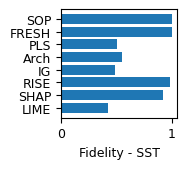

In [8]:
import matplotlib.pyplot as plt

expl_names_all_fig = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'GC',
    'intgrad': 'IG',
    'archipelago': 'Arch',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP'
}


scores = [results_all[expl_name]['expln_aggr_fidelities_mean'] 
                                for expl_name in expl_names_list if expl_name != 'idg']

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2, 1.8))
ind = list(range(len(scores)))
bars = ax.barh(range(len(scores)), scores)
ax.set_yticks(ind)
ax.set_yticklabels([expl_names_all_fig[expl_name] for expl_name in expl_names_list if expl_name != 'idg'])

plt.xlabel('Fidelity - SST', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('figs/fidelity-sst.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()



In [12]:
results_all[expl_name].keys()

dict_keys(['accuracies_mean', 'pred_agreements_mean', 'pred_agreements_soft_mean', 'expln_aggr_fidelities_mean', 'expln_aggr_fidelities_soft_mean', 'preservations_mean', 'preservations_original_mean', 'preservations_mean_topk', 'preservations_original_mean_topk', 'expln_aggr_accuracies_mean', 'nnzs_mean', 'ngroups_mean', 'comps_mean', 'suffs_mean', 'comps_original_mean', 'suffs_original_mean'])

In [17]:
# Creating the data for the table
keys = [expl_name for expl_name in expl_names_list if expl_name != 'idg']
fidelities_vals = [round(results_all[k]['expln_aggr_fidelities_mean'] , 4) for k in keys]
pred_acc_vals = [round(results_all[k]['expln_aggr_accuracies_mean'] , 4) for k in keys]

pred_agree_vals = [round(results_all[k]['pred_agreements_mean'] , 4) for k in keys]
# accuracies_mean
acc_vals = [round(results_all[k]['accuracies_mean'] , 4) for k in keys]

# Generating the Markdown table
markdown_table = "| Attr. Method | Fidelity (high) | Pred Acc (high) | Accuracy (high) | Agreement (high)|\n"
markdown_table += "|--------------|-----------------|-----------------|-----------------|-----------------|\n"

for name, fid, pre, acc, agree in zip(keys, fidelities_vals, pred_acc_vals, acc_vals, pred_agree_vals):
    markdown_table += f"| {name:<12} | {fid:^15} | {pre:^15} | {acc:^15} | {agree:^15} |\n"

print(markdown_table)


| Attr. Method | Fidelity (high) | Pred Acc (high) | Accuracy (high) | Agreement (high)|
|--------------|-----------------|-----------------|-----------------|-----------------|
| lime         |     0.4255      |     0.4232      |     0.9128      |       1.0       |
| shap         |     0.9197      |     0.8853      |     0.9128      |       1.0       |
| rise         |     0.9794      |     0.9174      |     0.9128      |       1.0       |
| intgrad      |     0.4908      |     0.4908      |     0.9128      |       1.0       |
| archipelago  |      0.547      |      0.547      |     0.9128      |       1.0       |
| pls          |     0.5092      |     0.5092      |     0.9128      |       1.0       |
| fresh        |       1.0       |     0.6502      |     0.6502      |     0.6686      |
| sop          |       1.0       |     0.8463      |     0.8463      |     0.8624      |



In [15]:
# Creating the data for the table
keys = [expl_name for expl_name in expl_names_list if expl_name != 'idg']
fidelities_vals = [round(results_all[k]['expln_aggr_fidelities_soft_mean'] , 10) for k in keys]
pred_acc_vals = [round(results_all[k]['expln_aggr_accuracies_mean'] , 10) for k in keys]

# Generating the Markdown table
markdown_table = "| Attr. Method | Fidelity Soft (low) |\n"
markdown_table += "|--------------|---------------------|\n"

for name, fid, pre in zip(keys, fidelities_vals, pred_acc_vals):
    markdown_table += f"| {name:<12} | {fid:^19} |\n"

print(markdown_table)


| Attr. Method | Fidelity Soft (low) |
|--------------|---------------------|
| lime         |    3.6398055076     |
| shap         |    0.2968315602     |
| rise         |    0.0426420219     |
| intgrad      |    5.9459318359     |
| archipelago  |    2.8321553086     |
| pls          |    2.2774929294     |
| fresh        |         0.0         |
| sop          |       -2e-10        |



In [58]:

def gen_latex_table(results_all, expl_names, expl_names_list, dataset_name, dataset_names):
    print('\\toprule')
    print(' & ', end='')
    for expl_name in expl_names_list:
        print('& {} '.format(expl_names[expl_name]), end='')
    print('\\\\ \\midrule')
    # print('\\multirow{3}{*}{' + dataset_names[dataset_name] + '} & Accuracy $\\uparrow$ ', end='')
    # accuracy_mean_max = max([results_all[expl_name]['accuracy_mean'] for expl_name in expl_names_list if expl_name in results_all])
    # for expl_name in expl_names_list:
    #     if expl_name in results_all:
    #         if results_all[expl_name]['accuracy_mean'] == accuracy_mean_max:
    #             print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['accuracy_mean']), end='')
    #         else:
    #             print('& {:.4f} '.format(results_all[expl_name]['accuracy_mean']), end='')
    #     else:
    #         print(' & ', end='')
    print('\\\\')
    for r_i, result_name in enumerate(result_names_minmax):
        best = result_names_minmax[result_name]
        result_name_display = ' '.join(result_name.split('_'))
        if best == min:
            print(f' & {result_name_display} $\\downarrow$', end='')
        else:
            print(f' & {result_name_display} $\\uparrow$', end='')
        score_mean_best = best([results_all[expl_name][result_name] \
                                    for expl_name in expl_names_list if expl_name in results_all])
        for expl_name in expl_names_list:
            # if expl_name == 'sop' and result_name in sop_result_name_swap:
            #     result_name_use = sop_result_name_swap[result_name]
            # else:
            #     result_name_use = result_name
            if expl_name in results_all:
                result_val = results_all[expl_name][result_name]
                
                if result_val == score_mean_best:
                    if round(result_val, 4) == 0:
                        result_val = abs(result_val)
                    print('& \\textbf{{{:.4f}}} '.format(result_val), end='')
                else:
                    if round(result_val, 4) == 0:
                        result_val = abs(result_val)
                    print('& {:.4f} '.format(result_val), end='')
            else:
                print(' & ', end='')
        print('\\\\')
    # print(' & Soft Fidelity Loss $\\downarrow$ ', end='')
    # soft_fidelity_loss_min = min([results_all[expl_name]['soft_fidelity_loss_mean'] \
    #                               for expl_name in expl_names_list if expl_name in results_all])
    # for expl_name in expl_names_list:
    #     if expl_name in results_all:
    #         if results_all[expl_name]['soft_fidelity_loss_mean'] == soft_fidelity_loss_min:
    #             print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['soft_fidelity_loss_mean']), end='')
    #         else:
    #             print('& {:.4f} '.format(results_all[expl_name]['soft_fidelity_loss_mean']), end='')
    #     else:
    #         print(' & ', end='')
    # print('\\\\')
    # print(' & NNZ $\\downarrow$ ', end='')
    # nnz_mean_min = min([results_all[expl_name]['nnz_mean'] for expl_name in expl_names_list if expl_name in results_all])
    # for expl_name in expl_names_list:
    #     if expl_name in results_all:
    #         if results_all[expl_name]['nnz_mean'] == nnz_mean_min:
    #             print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['nnz_mean']), end='')
    #         else:
    #             print('& {:.4f} '.format(results_all[expl_name]['nnz_mean']), end='')
    #     else:
    #         print(' & ', end='')
    # print('\\\\')

gen_latex_table(results_all_new, expl_names_all, expl_names_list, dataset_name, dataset_names)

\toprule
 & & LIME & SHAP & RISE & IntGrad & Archi-pelago & IDG & PLS & FRESH & SOP (ours) \\ \midrule
\\
 & accuracies mean $\uparrow$& \textbf{0.9128} & \textbf{0.9128} & \textbf{0.9128} & \textbf{0.9128} & \textbf{0.9128}  & & \textbf{0.9128} & 0.6502 & 0.8463 \\
 & pred agreements mean $\uparrow$& \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000}  & & \textbf{1.0000} & 0.6686 & 0.8624 \\
 & expln aggr fidelities mean $\uparrow$& 0.4255 & 0.9197 & 0.9794 & 0.4908 & 0.5470  & & 0.5092 & \textbf{1.0000} & \textbf{1.0000} \\
 & preservations original mean topk $\uparrow$& 0.5413 & \textbf{0.8853} & 0.7144 & 0.6227 & 0.7523  & & 0.6376 & 0.7443 & 0.6972 \\
 & expln aggr accuracies mean $\uparrow$& 0.4232 & 0.8853 & \textbf{0.9174} & 0.4908 & 0.5470  & & 0.5092 & 0.6502 & 0.8463 \\
 & nnzs mean $\downarrow$& 0.5109 & 0.9967 & 1.0000 & 0.9998 & 0.8153  & & 0.1996 & \textbf{0.1777} & 0.6937 \\
 & ngroups mean $\downarrow$& 4.9427 & 13.9300 & 21.9759 & 

In [ ]:
import matplotlib.pyplot as plt

expl_names_all_fig = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'GC',
    'intgrad': 'IG',
    'archipelago': 'Arch',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP'
}

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2, 1.8))
ind = list(range(len(preservation_scores)))
bars = ax.barh(range(len(preservation_scores)), preservation_scores)
ax.set_yticks(ind)
ax.set_yticklabels([expl_names_all_fig[expl_name] for expl_name in expl_names_list])
# Add numbers on top of the bars
# for bar in bars:
#     xval = bar.get_width()
#     ax.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='right', va='center', fontsize=9)

plt.xlabel('Preservation', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('figs/preservation-imagenet.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

# preservation_scores = [results_all_new[expl_name]['preservations_original_mean'] for expl_name in expl_names_list ]

# fig, ax = plt.subplots(figsize=(2, 1.8))
# ind = list(range(len(preservation_scores)))
# bars = ax.bar(range(len(preservation_scores)), preservation_scores)
# ax.set_xticks(ind)
# ax.set_xticklabels([expl_names_all_fig[expl_name] for expl_name in expl_names_list ], rotation=45)
# # Add numbers on top of the bars
# for bar in bars:
#     yval = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=14)

# plt.ylabel('Preservation', fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.savefig('figs/preservation-imagenet.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
# plt.show()

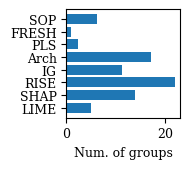

In [66]:
import matplotlib.pyplot as plt

ngroups_scores = [results_all[expl_name]['ngroups_mean'] 
                                for expl_name in expl_names_list if expl_name != 'idg']

expl_names_all_fig = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'GC',
    'intgrad': 'IG',
    'archipelago': 'Arch',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP'
}

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2, 1.8))
ind = list(range(len(ngroups_scores)))
bars = ax.barh(range(len(ngroups_scores)), ngroups_scores)
ax.set_yticks(ind)
ax.set_yticklabels([expl_names_all_fig[expl_name] for expl_name in expl_names_list if expl_name != 'idg'])
# Add numbers on top of the bars
# for bar in bars:
#     xval = bar.get_width()
#     ax.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='right', va='center', fontsize=9)

plt.xlabel('Num. of groups', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('figs/ngroups-sst.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

# fig, ax = plt.subplots()
# ind = list(range(len(ngroups_scores)))
# bars = ax.bar(range(len(ngroups_scores)), ngroups_scores)
# ax.set_xticks(ind)
# ax.set_xticklabels([expl_names_all[expl_name] for expl_name in expl_names_list if expl_name != 'idg'], rotation=45)
# # Add numbers on top of the bars
# for bar in bars:
#     yval = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=14)

# plt.ylabel('Number of groups', fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.savefig('figs/ngroups-sst.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
# plt.show()

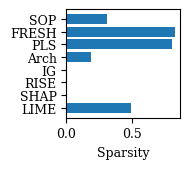

In [67]:
import matplotlib.pyplot as plt

nnzs_scores = [1 - results_all[expl_name]['nnzs_mean'] 
                                for expl_name in expl_names_list if expl_name != 'idg']

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2, 1.8))
ind = list(range(len(nnzs_scores)))
bars = ax.barh(range(len(nnzs_scores)), nnzs_scores)
ax.set_yticks(ind)
ax.set_yticklabels([expl_names_all_fig[expl_name] for expl_name in expl_names_list if expl_name != 'idg'])
# Add numbers on top of the bars
# for bar in bars:
#     xval = bar.get_width()
#     ax.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='right', va='center', fontsize=9)

plt.xlabel('Sparsity', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('figs/nnzs-sst.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

# fig, ax = plt.subplots()
# ind = list(range(len(nnzs_scores)))
# bars = ax.bar(range(len(nnzs_scores)), nnzs_scores)
# ax.set_xticks(ind)
# ax.set_xticklabels([expl_names_all[expl_name] for expl_name in expl_names_list if expl_name != 'idg'], rotation=45)
# # Add numbers on top of the bars
# for bar in bars:
#     yval = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=14)

# plt.ylabel('Number of Nonzeros', fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.savefig('figs/nnzs-sst.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
# plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics_show = {
    'Predictive Performance - SST': expln_aggr_accuracies_scores,
    'Preservation Check - ImageNet': preservation_scores,
    'Density - SST': nnzs_scores,
    'Number of Groups - SST': ngroups_scores
}

fig, axs = plt.subplots(figsize=(6.5, 2))

metric_names = list(metrics_show.keys())
all_scores = np.array([metrics_show[k] for k in metric_names])
all_scores.T


# Plotting
bars1 = ax.bar(ind - width, q1_means, width, label='Fragmentation')
bars2 = ax.bar(ind, q2_means, width, label='Purity')
bars3 = ax.bar(ind + width, q3_means, width, label='Visibility')

# Add numbers on top of the bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

ax.set_xticks(ind)
ax.set_xticklabels([method_map[methods[i]] for i in method_idxs_show], rotation=45, fontsize=14)
ax.set_ylabel('Score', fontsize=14)

plt.legend(loc='lower left')

In [65]:
import json
import sys
import os

exp_name = 'sst_m_1h_gg2.0_gs1.0'
dataset_name = 'sst'
results_dir = '../exps/{}/best/results'.format(exp_name)

sop_explainer_name = 'sop_gg0.5'

expl_names_all = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'Grad-CAM',
    'intgrad': 'IntGrad',
    'archipelago': 'Archi-pelago',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP (ours)'
}

potential_filenames = {expl_name: f'{sop_explainer_name}_{expl_name}_results.json' for expl_name in expl_names_all}
# if 'sop' not in potential_filenames:
potential_filenames['sop'] = f'{sop_explainer_name}_results.json'
    
    # print(potential_filenames)

results_all = {}
filenames_all = {}
for filename in os.listdir(results_dir):
    for expl_name in potential_filenames:
        filename = potential_filenames[expl_name]
        if os.path.exists(os.path.join(results_dir, filename)):
            
    # if filename in potential_filenames:
    # if filename.endswith(f'{sop_explainer_name}_results.json'):
            with open(os.path.join(results_dir, filename), 'r') as f:
                results = json.load(f)
            # expl_name = filename.split('_')[0]
            results_all[expl_name] = results
            filenames_all[expl_name] = filename
print(filenames_all)


# expl_names_list = [k for k in ['lime', 'shap', 'rise', 'gradcam', 'intgrad', 'archipelago', 'fresh', 'sop'] if k in results_all]
if dataset_name in ['imagenet']:
    expl_names_list = ['lime', 'shap', 'rise', 'gradcam', 'intgrad', 'archipelago', 'fresh', 'sop']
else:
    expl_names_list = ['lime', 'shap', 'rise', 'intgrad', 'archipelago', 'idg', 'pls', 'fresh', 'sop']
# expl_names = {k:expl_names_all[k] for k in results_all if k in results_all}

dataset_names = {
    'imagenet': 'ImageNet',
    'multirc': 'MultiRC',
    'sst': 'SST'
}


{'lime': 'sop_gg0.5_lime_results.json', 'shap': 'sop_gg0.5_shap_results.json', 'rise': 'sop_gg0.5_rise_results.json', 'intgrad': 'sop_gg0.5_intgrad_results.json', 'archipelago': 'sop_gg0.5_archipelago_results.json', 'pls': 'sop_gg0.5_pls_results.json', 'sop': 'sop_gg0.5_results.json'}


In [10]:

def gen_latex_table(results_all, expl_names, expl_names_list, dataset_name, dataset_names):
    print('\\toprule')
    print(' & ', end='')
    for expl_name in expl_names_list:
        print('& {} '.format(expl_names[expl_name]), end='')
    print('\\\\ \\midrule')
    # print('\\multirow{3}{*}{' + dataset_names[dataset_name] + '} & Accuracy $\\uparrow$ ', end='')
    # accuracy_mean_max = max([results_all[expl_name]['accuracy_mean'] for expl_name in expl_names_list if expl_name in results_all])
    # for expl_name in expl_names_list:
    #     if expl_name in results_all:
    #         if results_all[expl_name]['accuracy_mean'] == accuracy_mean_max:
    #             print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['accuracy_mean']), end='')
    #         else:
    #             print('& {:.4f} '.format(results_all[expl_name]['accuracy_mean']), end='')
    #     else:
    #         print(' & ', end='')
    print('\\\\')
    for r_i, result_name in enumerate(result_names_minmax):
        best = result_names_minmax[result_name]
        result_name_display = ' '.join(result_name.split('_'))
        if best == min:
            print(f' & {result_name_display} $\\downarrow$', end='')
        else:
            print(f' & {result_name_display} $\\uparrow$', end='')
        fidelity_mean_best = best([results_all[expl_name][result_name] \
                                    for expl_name in expl_names_list if expl_name in results_all])
        for expl_name in expl_names_list:
            if expl_name in results_all:
                result_val = results_all[expl_name][result_name]
                
                if result_val == fidelity_mean_best:
                    if round(result_val, 4) == 0:
                        result_val = abs(result_val)
                    print('& \\textbf{{{:.4f}}} '.format(result_val), end='')
                else:
                    if round(result_val, 4) == 0:
                        result_val = abs(result_val)
                    print('& {:.4f} '.format(result_val), end='')
            else:
                print(' & ', end='')
        print('\\\\')
    # print(' & Soft Fidelity Loss $\\downarrow$ ', end='')
    # soft_fidelity_loss_min = min([results_all[expl_name]['soft_fidelity_loss_mean'] \
    #                               for expl_name in expl_names_list if expl_name in results_all])
    # for expl_name in expl_names_list:
    #     if expl_name in results_all:
    #         if results_all[expl_name]['soft_fidelity_loss_mean'] == soft_fidelity_loss_min:
    #             print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['soft_fidelity_loss_mean']), end='')
    #         else:
    #             print('& {:.4f} '.format(results_all[expl_name]['soft_fidelity_loss_mean']), end='')
    #     else:
    #         print(' & ', end='')
    # print('\\\\')
    # print(' & NNZ $\\downarrow$ ', end='')
    # nnz_mean_min = min([results_all[expl_name]['nnz_mean'] for expl_name in expl_names_list if expl_name in results_all])
    # for expl_name in expl_names_list:
    #     if expl_name in results_all:
    #         if results_all[expl_name]['nnz_mean'] == nnz_mean_min:
    #             print('& \\textbf{{{:.4f}}} '.format(results_all[expl_name]['nnz_mean']), end='')
    #         else:
    #             print('& {:.4f} '.format(results_all[expl_name]['nnz_mean']), end='')
    #     else:
    #         print(' & ', end='')
    # print('\\\\')

gen_latex_table(results_all, expl_names_all, expl_names_list, dataset_name, dataset_names)

\toprule
 & & LIME & SHAP & RISE & IntGrad & Archi-pelago & IDG & PLS & FRESH & SOP (ours) \\ \midrule
\\
 & accuracies mean $\uparrow$& \textbf{0.9128} & \textbf{0.9128} & \textbf{0.9128} & \textbf{0.9128} & \textbf{0.9128}  & & \textbf{0.9128}  & & 0.8830 \\
 & pred agreements mean $\uparrow$& \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000}  & & \textbf{1.0000}  & & 0.9083 \\
 & pred agreements soft mean $\downarrow$& \textbf{0.0000} & 0.0000 & \textbf{0.0000} & \textbf{0.0000} & \textbf{0.0000}  & & 0.0000  & & 0.1713 \\
 & expln aggr fidelities mean $\uparrow$& 0.4255 & 0.9197 & 0.9794 & 0.4908 & 0.5470  & & 0.5092  & & \textbf{1.0000} \\
 & expln aggr fidelities soft mean $\downarrow$& 3.6398 & 0.2968 & 0.0426 & 5.9459 & 2.8322  & & 2.2775  & & \textbf{0.0000} \\
 & preservations mean $\uparrow$& 0.0000 & 0.0000 & 0.0000 & 0.0000 & 0.0000  & & 0.0000  & & \textbf{0.6778} \\
 & preservations original mean $\uparrow$& 0.6628 & 0.9300 & \textbf

In [32]:
import json
import sys
import os

exp_name = 'sst_m_1h_gg2.0_gs1.0'
dataset_name = 'sst'
results_dir = '../exps/{}/best/results'.format(exp_name)

sop_explainer_name = 'sop_gg1.0'

potential_filenames = {expl_name: f'{sop_explainer_name}_{expl_name}_results.json' for expl_name in expl_names_all}
# if 'sop' not in potential_filenames:
potential_filenames['sop'] = f'{sop_explainer_name}_results.json'
    
    # print(potential_filenames)

results_all = {}
filenames_all = {}
for filename in os.listdir(results_dir):
    for expl_name in potential_filenames:
        filename = potential_filenames[expl_name]
        if os.path.exists(os.path.join(results_dir, filename)):
            
    # if filename in potential_filenames:
    # if filename.endswith(f'{sop_explainer_name}_results.json'):
            with open(os.path.join(results_dir, filename), 'r') as f:
                results = json.load(f)
            # expl_name = filename.split('_')[0]
            results_all[expl_name] = results
            filenames_all[expl_name] = filename
print(filenames_all)

expl_names_all = {
    'lime': 'LIME',
    'shap': 'SHAP',
    'rise': 'RISE',
    'gradcam': 'Grad-CAM',
    'intgrad': 'IntGrad',
    'archipelago': 'Archi-pelago',
    'idg': 'IDG',
    'pls': 'PLS',
    'fresh': 'FRESH',
    'sop': 'SOP (ours)'
}
# expl_names_list = [k for k in ['lime', 'shap', 'rise', 'gradcam', 'intgrad', 'archipelago', 'fresh', 'sop'] if k in results_all]
if dataset_name in ['imagenet']:
    expl_names_list = ['lime', 'shap', 'rise', 'gradcam', 'intgrad', 'archipelago', 'fresh', 'sop']
else:
    expl_names_list = ['lime', 'shap', 'rise', 'intgrad', 'archipelago', 'idg', 'pls', 'fresh', 'sop']
# expl_names = {k:expl_names_all[k] for k in results_all if k in results_all}

dataset_names = {
    'imagenet': 'ImageNet',
    'multirc': 'MultiRC',
    'sst': 'SST'
}


{}
